In [1]:
# external imports
import numpy as np

# local imports
import pynumdiff
simulate = pynumdiff.utils.simulate
evaluate = pynumdiff.utils.evaluate

import matplotlib.pyplot as plt

In [4]:
# simulation parameters

# noise is generated using np.random, e.g. np.random.normal, np.random.uniform, np.random.poisson
# noise_type and noise_parameters should be compatible with np.random functions 
noise_type = 'normal'
noise_parameters = [0, 0.05]

# time step and time series length
dt = 0.01
timeseries_length = 4 # steps

In [5]:
# simulate data

x, x_truth, dxdt_truth, extras = simulate.pi_control(dt=dt,
                                                   timeseries_length=timeseries_length,
                                                   noise_type=noise_type, 
                                                   noise_parameters=noise_parameters,
                                                   random_seed=1)

# 0. Simulation and Finite Difference

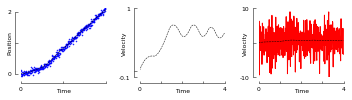

In [6]:
fig = plt.figure(figsize=(5, 1.5))
fig.subplots_adjust(wspace=0.5)
fig.subplots_adjust(bottom=0.3)
xlim = [0, 4]
ylim=[-.1, 1]

ax_x = fig.add_subplot(131)
pynumdiff.paper.plot.plot_position(dt, x, None, x_truth, ax_x=ax_x, xlim=xlim, ylim=[0, 2])

x_hat, dxdt_hat = pynumdiff.finite_difference.first_order(x, dt)

ax_dxdt = fig.add_subplot(132)
pynumdiff.paper.plot.plot_velocity(dt, None, dxdt_truth, ax_dxdt=ax_dxdt, xlim=xlim, ylim=[-.1, 1])

ax_dxdt = fig.add_subplot(133)
pynumdiff.paper.plot.plot_velocity(dt, dxdt_hat, dxdt_truth, ax_dxdt=ax_dxdt, xlim=xlim, ylim=[-10, 10])

fig.savefig('../figures/noisydata.pdf')

# 1. Finite Difference

### 1.1 Finite Difference: First Order

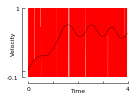

In [15]:
x_hat, dxdt_hat = pynumdiff.finite_difference.first_order(x, dt)

fig = plt.figure(figsize=(2, 1.5))
fig.subplots_adjust(wspace=0.4)
ax_dxdt = fig.add_subplot(111)
pynumdiff.paper.plot.plot_velocity(dt, dxdt_hat, dxdt_truth, ax_dxdt=ax_dxdt, xlim=xlim, ylim=ylim)

fig.savefig('../figures/fig_fd_firstorder.pdf')

### 1.2 Finite Difference: Second Order

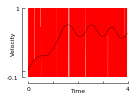

In [16]:
x_hat, dxdt_hat = pynumdiff.finite_difference.second_order(x, dt)

fig = plt.figure(figsize=(2, 1.5))
fig.subplots_adjust(wspace=0.4)
ax_dxdt = fig.add_subplot(111)
pynumdiff.paper.plot.plot_velocity(dt, dxdt_hat, dxdt_truth, ax_dxdt=ax_dxdt, xlim=xlim, ylim=ylim)

fig.savefig('../figures/fig_fd_secondorder.pdf')

### 1.3 Finite Difference: Iterated First Order

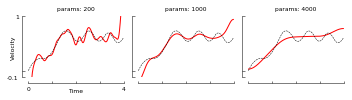

In [17]:
params = [[200], [1000], [4000]]

fig = plt.figure(figsize=(5, 1.5))

for i, p in enumerate(params):
    ax_dxdt = fig.add_subplot(1,3,i+1)
    if i == 0:
        ticklabels = ['left', 'bottom']
    else:
        ticklabels = []
        
    x_hat, dxdt_hat = pynumdiff.finite_difference.first_order(x, dt, p, options={'iterate': True})
    pynumdiff.paper.plot.plot_velocity(dt, dxdt_hat, dxdt_truth, ax_dxdt=ax_dxdt, xlim=xlim, ylim=ylim, 
                                       ticklabels=ticklabels, params=p)
    
fig.savefig('../figures/fig_fd_iterated.pdf')

# 2. Smooth Finite Difference

### 2.1 Smooth Finite Difference: Median smoothing

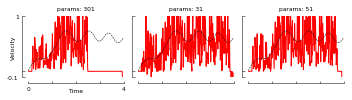

In [18]:
params = [[301], [31], [51]]

fig = plt.figure(figsize=(5, 1.5))

for i, p in enumerate(params):
    ax_dxdt = fig.add_subplot(1,3,i+1)
    if i == 0:
        ticklabels = ['left', 'bottom']
    else:
        ticklabels = []
        
    x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.mediandiff(x, dt, p, options={'iterate': False})
    pynumdiff.paper.plot.plot_velocity(dt, dxdt_hat, dxdt_truth, ax_dxdt=ax_dxdt, xlim=xlim, ylim=ylim, 
                                       ticklabels=ticklabels, params=p)
    
fig.savefig('../figures/fig_sfd_median.pdf')

### 2.2 Smooth Finite Difference: Mean smoothing

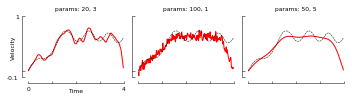

In [50]:
params = [[20, 3], [100,1], [50, 5]]

fig = plt.figure(figsize=(5, 1.5))

for i, p in enumerate(params):
    ax_dxdt = fig.add_subplot(1,3,i+1)
    if i == 0:
        ticklabels = ['left', 'bottom']
    else:
        ticklabels = []
        
    x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.meandiff(x, dt, p, options={'iterate': True})
    pynumdiff.paper.plot.plot_velocity(dt, dxdt_hat, dxdt_truth, ax_dxdt=ax_dxdt, xlim=xlim, ylim=ylim, 
                                       ticklabels=ticklabels, params=p)
    
fig.savefig('../figures/fig_sfd_mean.pdf')

### 2.3 Smooth Finite Difference: Gaussian smoothing

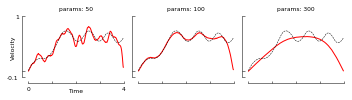

In [20]:
params = [[50], [100], [300]]

fig = plt.figure(figsize=(5, 1.5))

for i, p in enumerate(params):
    ax_dxdt = fig.add_subplot(1,3,i+1)
    if i == 0:
        ticklabels = ['left', 'bottom']
    else:
        ticklabels = []
        
    x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.gaussiandiff(x, dt, p, options={'iterate': False})
    pynumdiff.paper.plot.plot_velocity(dt, dxdt_hat, dxdt_truth, ax_dxdt=ax_dxdt, xlim=xlim, ylim=ylim, 
                                       ticklabels=ticklabels, params=p)
    
fig.savefig('../figures/fig_sfd_gaussian.pdf')

### 2.4 Smooth Finite Difference: Friedrichs smoothing

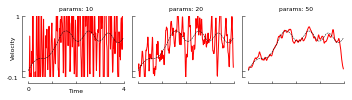

In [21]:
params = [[10], [20], [50]]

fig = plt.figure(figsize=(5, 1.5))

for i, p in enumerate(params):
    ax_dxdt = fig.add_subplot(1,3,i+1)
    if i == 0:
        ticklabels = ['left', 'bottom']
    else:
        ticklabels = []
        
    x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.friedrichsdiff(x, dt, p, options={'iterate': False})
    pynumdiff.paper.plot.plot_velocity(dt, dxdt_hat, dxdt_truth, ax_dxdt=ax_dxdt, xlim=xlim, ylim=ylim, 
                                       ticklabels=ticklabels, params=p)
    
fig.savefig('../figures/fig_sfd_friedrichs.pdf')

### 2.5 Smooth Finite Difference: Butterworth smoothing

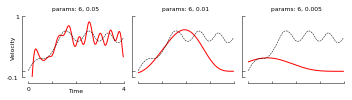

In [22]:
params = [[6, 0.05], [6, 0.01], [6, 0.005]]

fig = plt.figure(figsize=(5, 1.5))

for i, p in enumerate(params):
    ax_dxdt = fig.add_subplot(1,3,i+1)
    if i == 0:
        ticklabels = ['left', 'bottom']
    else:
        ticklabels = []
        
    x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.butterdiff(x, dt, p, options={'iterate': False})
    pynumdiff.paper.plot.plot_velocity(dt, dxdt_hat, dxdt_truth, ax_dxdt=ax_dxdt, xlim=xlim, ylim=ylim, 
                                       ticklabels=ticklabels, params=p)
    
fig.savefig('../figures/fig_sfd_butterworth.pdf')

### 2.6 Smooth Finite Difference: Spline smoothing

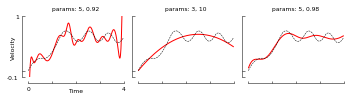

In [51]:
params = [[5, 0.92], [5, 0.94], [5, 0.98]]

fig = plt.figure(figsize=(5, 1.5))

for i, p in enumerate(params):
    ax_dxdt = fig.add_subplot(1,3,i+1)
    if i == 0:
        ticklabels = ['left', 'bottom']
    else:
        ticklabels = []
        
    x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.splinediff(x, dt, p, options={'iterate': False})
    pynumdiff.paper.plot.plot_velocity(dt, dxdt_hat, dxdt_truth, ax_dxdt=ax_dxdt, xlim=xlim, ylim=ylim, 
                                       ticklabels=ticklabels, params=p)
    
fig.savefig('../figures/fig_sfd_spline.pdf')

# 3. Total Variation Regularization

### 3.1 Total Variation Regularization: regularize velocity

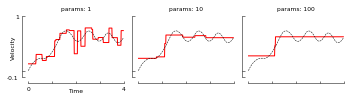

In [25]:
params = [[1], [10], [100]]

fig = plt.figure(figsize=(5, 1.5))

for i, p in enumerate(params):
    ax_dxdt = fig.add_subplot(1,3,i+1)
    if i == 0:
        ticklabels = ['left', 'bottom']
    else:
        ticklabels = []
        
    x_hat, dxdt_hat = pynumdiff.total_variation_regularization.velocity(x, dt, p)
    pynumdiff.paper.plot.plot_velocity(dt, dxdt_hat, dxdt_truth, ax_dxdt=ax_dxdt, xlim=xlim, ylim=ylim, 
                                       ticklabels=ticklabels, params=p)
    
fig.savefig('../figures/fig_tvr_velocity.pdf')

### 3.2 Total Variation Regularization: regularize acceleration

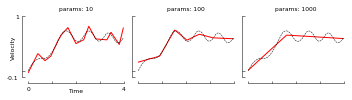

In [26]:
params = [[10], [100], [1000]]

fig = plt.figure(figsize=(5, 1.5))

for i, p in enumerate(params):
    ax_dxdt = fig.add_subplot(1,3,i+1)
    if i == 0:
        ticklabels = ['left', 'bottom']
    else:
        ticklabels = []
        
    x_hat, dxdt_hat = pynumdiff.total_variation_regularization.acceleration(x, dt, p)
    pynumdiff.paper.plot.plot_velocity(dt, dxdt_hat, dxdt_truth, ax_dxdt=ax_dxdt, xlim=xlim, ylim=ylim, 
                                       ticklabels=ticklabels, params=p)
    
fig.savefig('../figures/fig_tvr_acceleration.pdf')

### 3.3 Total Variation Regularization: regularize jerk

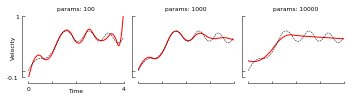

In [27]:
params = [[100], [1000], [10000]]

fig = plt.figure(figsize=(5, 1.5))

for i, p in enumerate(params):
    ax_dxdt = fig.add_subplot(1,3,i+1)
    if i == 0:
        ticklabels = ['left', 'bottom']
    else:
        ticklabels = []
        
    x_hat, dxdt_hat = pynumdiff.total_variation_regularization.jerk(x, dt, p)
    pynumdiff.paper.plot.plot_velocity(dt, dxdt_hat, dxdt_truth, ax_dxdt=ax_dxdt, xlim=xlim, ylim=ylim, 
                                       ticklabels=ticklabels, params=p)
    
fig.savefig('../figures/fig_tvr_jerk.pdf')

# 4. Linear Models

### 4.1 Linear Models: Spectral derivative

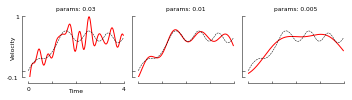

In [31]:
params = [[0.03], [0.01], [0.005]]

fig = plt.figure(figsize=(5, 1.5))

for i, p in enumerate(params):
    ax_dxdt = fig.add_subplot(1,3,i+1)
    if i == 0:
        ticklabels = ['left', 'bottom']
    else:
        ticklabels = []
        
    x_hat, dxdt_hat = pynumdiff.linear_model.spectraldiff(x, dt, p)
    pynumdiff.paper.plot.plot_velocity(dt, dxdt_hat, dxdt_truth, ax_dxdt=ax_dxdt, xlim=xlim, ylim=ylim, 
                                       ticklabels=ticklabels, params=p)
    
fig.savefig('../figures/fig_linear_spectral.pdf')

### 4.2 Linear Models: Sliding polynomial fit

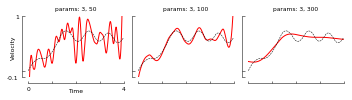

In [34]:
params = [[3, 50], [3, 100], [3, 300]]

fig = plt.figure(figsize=(5, 1.5))

for i, p in enumerate(params):
    ax_dxdt = fig.add_subplot(1,3,i+1)
    if i == 0:
        ticklabels = ['left', 'bottom']
    else:
        ticklabels = []
        
    x_hat, dxdt_hat = pynumdiff.linear_model.polydiff(x, dt, p)
    pynumdiff.paper.plot.plot_velocity(dt, dxdt_hat, dxdt_truth, ax_dxdt=ax_dxdt, xlim=xlim, ylim=ylim, 
                                       ticklabels=ticklabels, params=p)
    
fig.savefig('../figures/fig_linear_polydiff.pdf')

### 4.3 Linear Models: Sliding chebychev polynomial fit

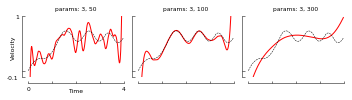

In [35]:
params = [[3, 50], [3, 100], [3, 300]]

fig = plt.figure(figsize=(5, 1.5))

for i, p in enumerate(params):
    ax_dxdt = fig.add_subplot(1,3,i+1)
    if i == 0:
        ticklabels = ['left', 'bottom']
    else:
        ticklabels = []
        
    x_hat, dxdt_hat = pynumdiff.linear_model.chebydiff(x, dt, p)
    pynumdiff.paper.plot.plot_velocity(dt, dxdt_hat, dxdt_truth, ax_dxdt=ax_dxdt, xlim=xlim, ylim=ylim, 
                                       ticklabels=ticklabels, params=p)
    
fig.savefig('../figures/fig_linear_chebydiff.pdf')

### 4.4 Linear Models: Sliding dynamic mode decomposition fit

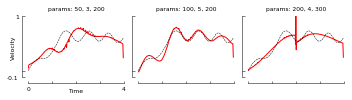

In [6]:
params = [[50, 3, 200], [100, 5, 200], [200, 4, 300]]

fig = plt.figure(figsize=(5, 1.5))

for i, p in enumerate(params):
    ax_dxdt = fig.add_subplot(1,3,i+1)
    if i == 0:
        ticklabels = ['left', 'bottom']
    else:
        ticklabels = []
        
    x_hat, dxdt_hat = pynumdiff.linear_model.dmddiff(x, dt, p)# , options={'sliding': True})
    pynumdiff.paper.plot.plot_velocity(dt, dxdt_hat, dxdt_truth, ax_dxdt=ax_dxdt, xlim=xlim, ylim=ylim, 
                                       ticklabels=ticklabels, params=p)
    
fig.savefig('../figures/fig_linear_dmddiff.pdf')

### 4.5 Linear Models: Sliding linear time invariant system fit

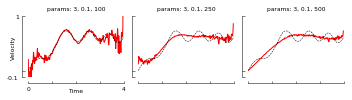

In [37]:
params = [[3, 0.1, 100], [3, 0.1, 250], [3, 0.1, 500]]

fig = plt.figure(figsize=(5, 1.5))

for i, p in enumerate(params):
    ax_dxdt = fig.add_subplot(1,3,i+1)
    if i == 0:
        ticklabels = ['left', 'bottom']
    else:
        ticklabels = []
        
    x_hat, dxdt_hat = pynumdiff.linear_model.lineardiff(x, dt, p)
    pynumdiff.paper.plot.plot_velocity(dt, dxdt_hat, dxdt_truth, ax_dxdt=ax_dxdt, xlim=xlim, ylim=ylim, 
                                       ticklabels=ticklabels, params=p)
    
fig.savefig('../figures/fig_linear_lineardiff.pdf')

# Kalman smoothing

### 5.1 Kalman smoothing: constant velocity (forward-backward)

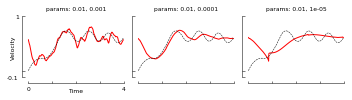

In [38]:
params = [[0.01, 1e-3], [0.01, 1e-4], [0.01, 1e-5]]

fig = plt.figure(figsize=(5, 1.5))

for i, p in enumerate(params):
    ax_dxdt = fig.add_subplot(1,3,i+1)
    if i == 0:
        ticklabels = ['left', 'bottom']
    else:
        ticklabels = []
        
    x_hat, dxdt_hat = pynumdiff.kalman_smooth.constant_velocity(x, dt, p)
    pynumdiff.paper.plot.plot_velocity(dt, dxdt_hat, dxdt_truth, ax_dxdt=ax_dxdt, xlim=xlim, ylim=ylim, 
                                       ticklabels=ticklabels, params=p)
    
fig.savefig('../figures/fig_kalman_vel.pdf')

### 5.2 Kalman smoothing: constant acceleration (forward-backward)

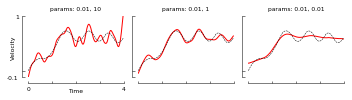

In [43]:
params = [[0.01, 10], [0.01, 1], [0.01, 1e-2]]

fig = plt.figure(figsize=(5, 1.5))

for i, p in enumerate(params):
    ax_dxdt = fig.add_subplot(1,3,i+1)
    if i == 0:
        ticklabels = ['left', 'bottom']
    else:
        ticklabels = []
        
    x_hat, dxdt_hat = pynumdiff.kalman_smooth.constant_acceleration(x, dt, p)
    pynumdiff.paper.plot.plot_velocity(dt, dxdt_hat, dxdt_truth, ax_dxdt=ax_dxdt, xlim=xlim, ylim=ylim, 
                                       ticklabels=ticklabels, params=p)
    
fig.savefig('../figures/fig_kalman_acc.pdf')

# Kalman filter, smoother, fb

In [76]:
import figurefirst

<Figure size 360x108 with 0 Axes>

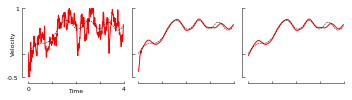

In [84]:
###
fig = plt.figure(figsize=(5, 1.5))
fig.tight_layout()
###

r, q = [0.01, 1]
params = [r, q]

A = np.matrix([[1, dt, 0], 
               [0, 1, dt],
               [0, 0,  1]])
B = np.matrix([[0], [0], [0]])
C = np.matrix([[1, 0, 0]])
R = np.matrix([[r]])
Q = np.matrix([[1e-16, 0, 0], 
               [0, 1e-16, 0],
               [0,     0, q]])
x0 = np.matrix([[x[0]], [0], [0]])
P0 = np.matrix(10*np.eye(3))
y = np.matrix(x)
u = None

xhat_fp, xhat_fm, P_fp, P_fm = pynumdiff.kalman_smooth.__kalman_forward_filter__(x0, P0, np.matrix(x), None, A, B, C, R, Q)


###
ax_dxdt = fig.add_subplot(1,3,1)
dxdt_hat = np.ravel(xhat_fp[1,:])

ticklabels = ['left', 'bottom']
pynumdiff.paper.plot.plot_velocity(dt, dxdt_hat, dxdt_truth, ax_dxdt=ax_dxdt, xlim=xlim, ylim=[-0.5, 1], 
                                   ticklabels=ticklabels, params=None)
###
xhat_smooth, P_smooth = pynumdiff.kalman_smooth.__kalman_backward_smooth__(xhat_fp, xhat_fm, P_fp, P_fm, A)
ax_dxdt = fig.add_subplot(1,3,2)
dxdt_hat = np.ravel(xhat_smooth[1,:])

ticklabels = []
pynumdiff.paper.plot.plot_velocity(dt, dxdt_hat, dxdt_truth, ax_dxdt=ax_dxdt, xlim=xlim, ylim=[-0.5, 1], 
                                   ticklabels=ticklabels, params=None)
###

x_hat, dxdt_hat = pynumdiff.kalman_smooth.constant_acceleration(x, dt, [r, q])

ax_dxdt = fig.add_subplot(1,3,3)
ticklabels = []
pynumdiff.paper.plot.plot_velocity(dt, dxdt_hat, dxdt_truth, ax_dxdt=ax_dxdt, xlim=xlim, ylim=[-0.5, 1], 
                                   ticklabels=ticklabels, params=None)

figurefirst.mpl_functions.set_fontsize(fig, 6)
plt.tight_layout()
fig.savefig('../figures/fig_kalman_filter_smoother_fb.pdf')

# Neural nets

/home/caveman/BMD2/lib/python3.5/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


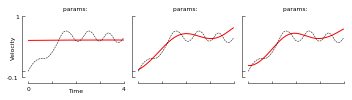

In [12]:
options_1 = {'layer_sizes': [1,50,1], 'beta': 1e-5}
options_2 = {'layer_sizes': [1,3,3,3,1], 'beta': 1e-5}
options_3 = {'layer_sizes': [1,50,50,50,1], 'beta': 1e-5}

options_list = [options_1, options_2, options_3]

fig = plt.figure(figsize=(5, 1.5))

for i, options in enumerate(options_list):
    ax_dxdt = fig.add_subplot(1,3,i+1)
    if i == 0:
        ticklabels = ['left', 'bottom']
    else:
        ticklabels = []
        
    x_hat, dxdt_hat = pynumdiff.nnet.quasinewton(x, dt, [], options)
    
    pynumdiff.paper.plot.plot_velocity(dt, dxdt_hat, dxdt_truth, ax_dxdt=ax_dxdt, xlim=xlim, ylim=ylim, 
                                       ticklabels=ticklabels, params=p)
    
fig.savefig('../figures/fig_nnet_quasinewton.pdf')

/home/caveman/BMD2/lib/python3.5/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


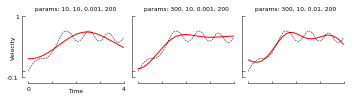

In [14]:
option = {'layer_sizes': [1,50,50,50,1], 'beta': 1e-5}

params = [[10, 10, 0.001, 200], [300, 10, 0.001, 200], [300, 10, 0.01, 200]]

options_list = [options_1, options_2, options_3]

fig = plt.figure(figsize=(5, 1.5))

for i, p in enumerate(params):
    ax_dxdt = fig.add_subplot(1,3,i+1)
    if i == 0:
        ticklabels = ['left', 'bottom']
    else:
        ticklabels = []
        
    x_hat, dxdt_hat = pynumdiff.nnet.adam(x, dt, p, options)
    
    pynumdiff.paper.plot.plot_velocity(dt, dxdt_hat, dxdt_truth, ax_dxdt=ax_dxdt, xlim=xlim, ylim=ylim, 
                                       ticklabels=ticklabels, params=p)
    
fig.savefig('../figures/fig_nnet_adam.pdf')